Visualize attention map of trained ViT

In [119]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchinfo import summary
from imageclassification import prepare_dataloaders
from vit import ViT

## Load model

In [123]:
# Load the model
model = ViT(image_size=(32,32), patch_size=(4,4), channels=3, 
            embed_dim=128, num_heads=4, num_layers=4,
            pos_enc='learnable', pool='cls', dropout=0.3, fc_dim=None, 
            num_classes=2
            )
model.load_state_dict(torch.load('model.pth'))

batch_size = 16
summary(model, input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ViT                                      [16, 2]                   8,448
├─Sequential: 1-1                        [16, 64, 128]             --
│    └─Rearrange: 2-1                    [16, 64, 48]              --
│    └─LayerNorm: 2-2                    [16, 64, 48]              96
│    └─Linear: 2-3                       [16, 64, 128]             6,272
│    └─LayerNorm: 2-4                    [16, 64, 128]             256
├─Dropout: 1-2                           [16, 65, 128]             --
├─Sequential: 1-3                        [16, 65, 128]             --
│    └─EncoderBlock: 2-5                 [16, 65, 128]             --
│    │    └─Attention: 3-1               [16, 65, 128]             65,664
│    │    └─LayerNorm: 3-2               [16, 65, 128]             256
│    │    └─Dropout: 3-3                 [16, 65, 128]             --
│    │    └─Sequential: 3-4              [16, 65, 128]             131,96

odict_keys(['cls_token', 'positional_embedding', 'to_patch_embedding.1.weight', 'to_patch_embedding.1.bias', 'to_patch_embedding.2.weight', 'to_patch_embedding.2.bias', 'to_patch_embedding.3.weight', 'to_patch_embedding.3.bias', 'transformer_blocks.0.attention.k_projection.weight', 'transformer_blocks.0.attention.q_projection.weight', 'transformer_blocks.0.attention.v_projeciton.weight', 'transformer_blocks.0.attention.o_projection.weight', 'transformer_blocks.0.attention.o_projection.bias', 'transformer_blocks.0.layernorm1.weight', 'transformer_blocks.0.layernorm1.bias', 'transformer_blocks.0.layernorm2.weight', 'transformer_blocks.0.layernorm2.bias', 'transformer_blocks.0.fc.0.weight', 'transformer_blocks.0.fc.0.bias', 'transformer_blocks.0.fc.1.weight', 'transformer_blocks.0.fc.1.bias', 'transformer_blocks.0.fc.3.weight', 'transformer_blocks.0.fc.3.bias', 'transformer_blocks.1.attention.k_projection.weight', 'transformer_blocks.1.attention.q_projection.weight', 'transformer_blocks.1

<Figure size 1000x1000 with 0 Axes>

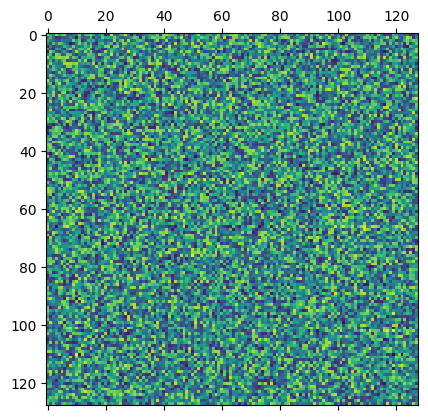

In [124]:
# View the model keys (from the state_dict)
model = torch.load('model.pth')
print(model.keys())

# Show only the ones that contain the word "attention"
attention_keys = [k for k in model.keys() if 'attention' in k]
print(attention_keys)

# Find the models attention weights
attention_weights = model['transformer_blocks.2.attention.o_projection.weight']
print(attention_weights.shape)

# Plot the attention weights
plt.figure(figsize=(10, 10))
plt.matshow(attention_weights.cpu(), cmap='viridis')
plt.show()

## Load data

In [125]:
train_iter, test_iter, _, _ = prepare_dataloaders(batch_size=batch_size)
# Take a single batch from the test set
image, label = next(iter(test_iter))

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])


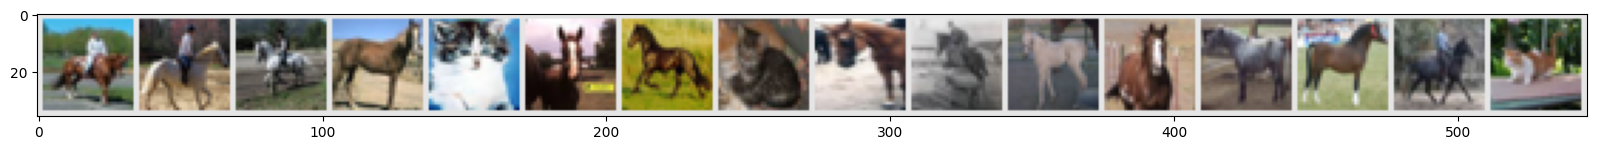

In [126]:
print(image[0].shape)

# show the originial images
img_grid = torchvision.utils.make_grid(image, nrow=batch_size, 
                                        normalize=True, pad_value=0.9
    )
# plot the image
plt.figure(figsize=(20, 20))
plt.imshow(np.transpose(img_grid, (1, 2, 0)))

# Run through model

In [ ]:
model.eval()

In [106]:
# Load the model
model = ViT(image_size=(32,32), patch_size=(4,4), channels=3, 
            embed_dim=128, num_heads=4, num_layers=4,
            pos_enc='learnable', pool='cls', dropout=0.3, fc_dim=None, 
            num_classes=2
            )
model.load_state_dict(torch.load('model.pth'))

out = model(image)